In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.express as px
from utils import  *
from scipy.signal import savgol_filter, find_peaks
import seaborn as sns
import plotly.express as px
import pickle

In [3]:
results = pd.read_csv('/home/anuarsantoyo/PycharmProjects/Batbot/experiments/optimizer_batbotV2/231109/test1/results.csv')
results = results.drop_duplicates().reset_index(drop=True)

# Visualization of results

# Parameter Evolution over time

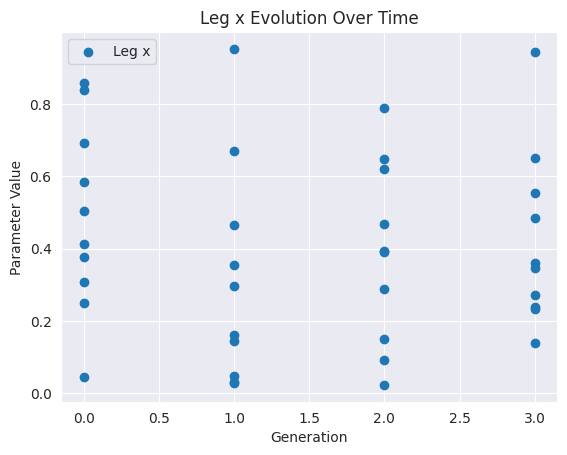

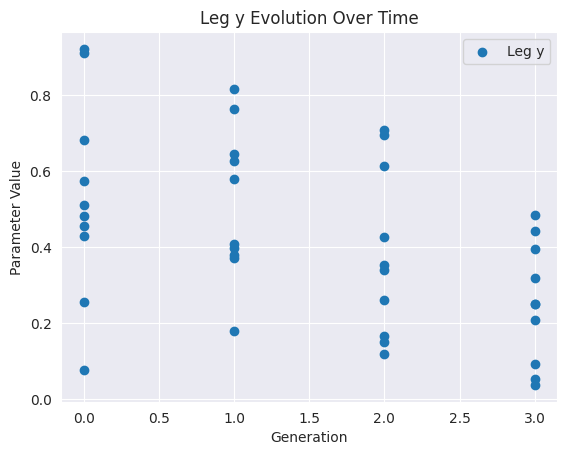

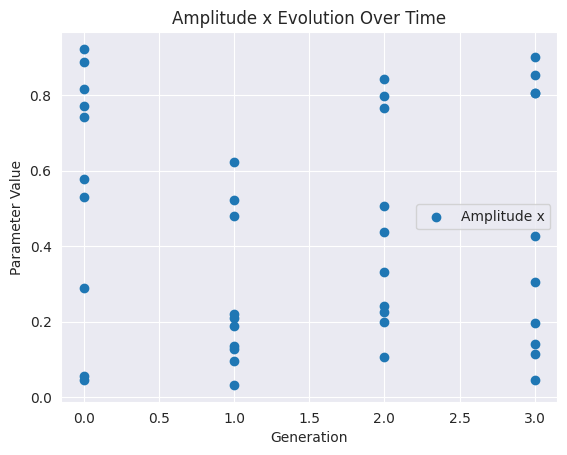

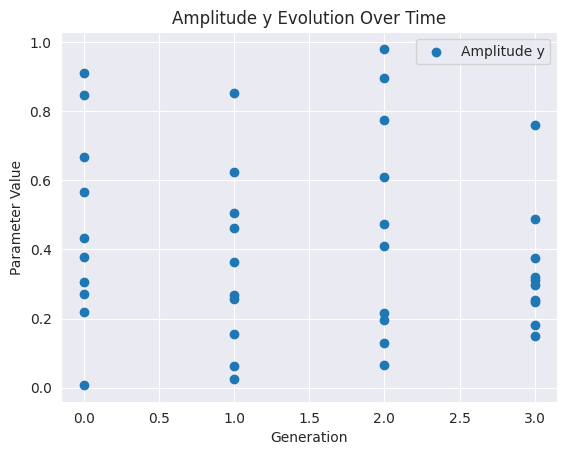

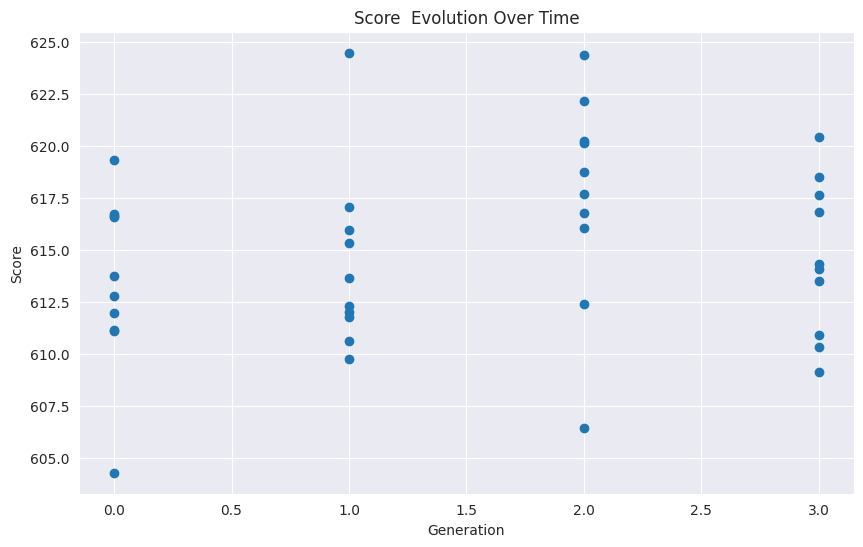

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data: each row is an iteration and columns represent parameter values
# Replace this with your actual data
df = results.copy()

# Plotting


for param in df.drop(['Generation', 'Id', 'Score'],axis=1).columns:
    plt.scatter(df['Generation'],df[param], label=param)
    plt.title(f'{param} Evolution Over Time')
    plt.xlabel('Generation')
    plt.ylabel('Parameter Value')
    plt.legend()
    plt.show()
    
plt.figure(figsize=(10, 6))
plt.scatter(df['Generation'],df['Score'])
plt.title('Score  Evolution Over Time')
plt.xlabel('Generation')
plt.ylabel('Score')
plt.show()

In [7]:
df.drop(['Generation', 'Id'],axis=1).corr()['Score'].sort_values(ascending=False)

Score          1.000000
Amplitude y    0.287900
Leg y          0.112199
Amplitude x   -0.044742
Leg x         -0.081179
Ellipse       -0.202042
Motor         -0.653630
Name: Score, dtype: float64

# 2D Parameter Pair Plots

In [ ]:
from itertools import combinations

params = df.drop(['Generation', 'Id', 'Score'],axis=1).columns
pairs = list(combinations(params, 2))

for pair in pairs:
    plt.figure(figsize=(6, 6))
    plt.scatter(df[pair[0]], df[pair[1]], c=df['Score'], cmap='viridis', label=f'{pair[0]} vs {pair[1]}')
    plt.title(f'{pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.colorbar(label='Score')
    plt.show()

# Parallel Coordinate Plot

In [ ]:
df = results.sort_values(by='Score').head(50)

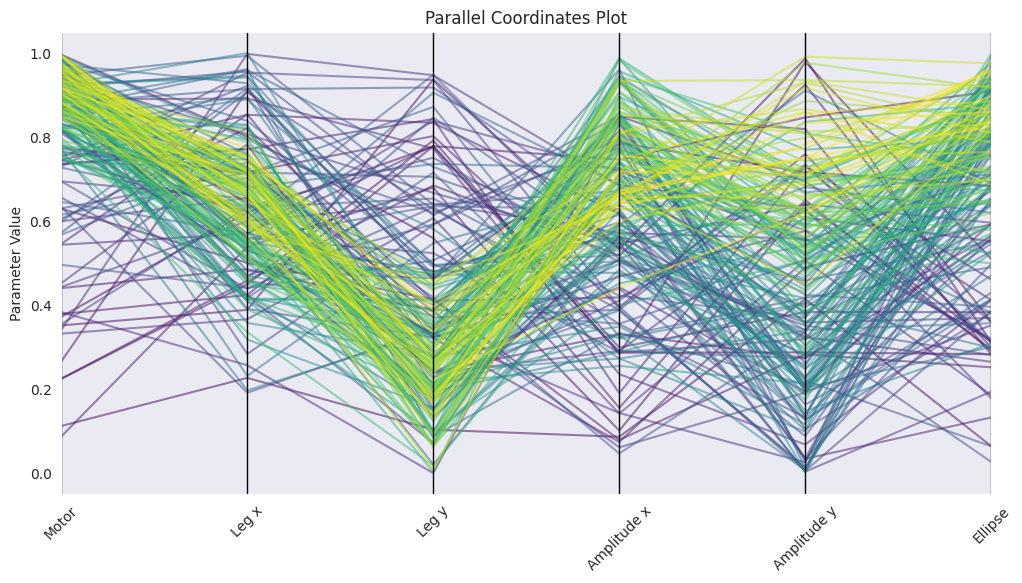

In [11]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(12, 6))
parallel_coordinates(df.drop(['Generation', 'Id'], axis=1), class_column='Score', colormap='viridis', alpha=0.5)
plt.legend().set_visible(False)
plt.title('Parallel Coordinates Plot')
plt.ylabel('Parameter Value')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.mean()

# Results comparison


In [15]:
results1 = pd.read_csv('/home/anuarsantoyo/PycharmProjects/Batbot/experiments/optimizer_batbotV2_2D/230915/test_extended1/results.csv')
results1 = results1.drop_duplicates().reset_index(drop=True)
results1['Experiment'] = 'Extended'

results2 = pd.read_csv('/home/anuarsantoyo/PycharmProjects/Batbot/experiments/optimizer_batbotV2_2D/230916/test_folding1/results.csv')
results2 = results2.drop_duplicates().reset_index(drop=True)
results2['Experiment'] = 'Folding_1'

results3 = pd.read_csv('/home/anuarsantoyo/PycharmProjects/Batbot/experiments/optimizer_batbotV2_2D/230916/test_folding2/results.csv')
results3 = results3.drop_duplicates().reset_index(drop=True)
results3['Experiment'] = 'Folding_2'

In [6]:

results = pd.concat([results,results3]) 

In [11]:
fig = px.box(results, x='Generation', y='Score', color='Experiment')
fig.show()

In [20]:
results.Generation = results.Generation + results3.Generation.max()

In [21]:
results_combined = pd.concat([results,results3]) 

<Axes: xlabel='Generation', ylabel='Score'>

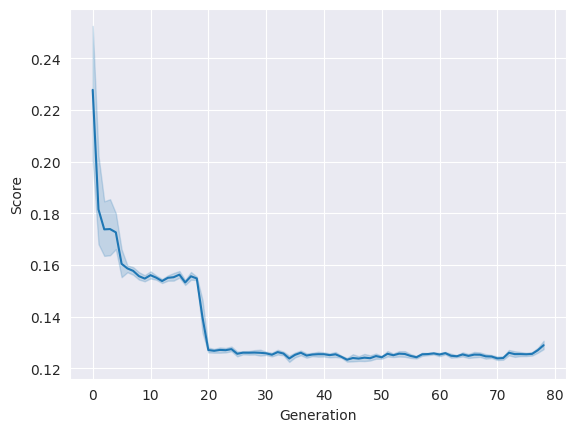

In [23]:
sns.lineplot(results_combined, x='Generation', y='Score')

In [12]:
min_scores = results.groupby('Experiment')['Score'].min()

# Create an empty DataFrame to store the rows
filtered_df = pd.DataFrame()

for experiment, min_score in min_scores.items():
    # Get rows corresponding to the current experiment with the minimum score
    subset = results[(results['Experiment'] == experiment) & (results['Score'] == min_score)]
    filtered_df = pd.concat([filtered_df, subset])

print(filtered_df)


     Generation  Id     Score     Motor    Attack Experiment
226          22   6  0.148162  0.958872  0.495959   Extended
287          28   7  0.150243  0.955151  0.566954  Folding_1
50            5   0  0.148647  0.907948  0.582431  Folding_2
